In [1]:
import numpy as np, pandas as pd

In [63]:
loan_df = pd.read_csv("data\loan.csv")
loan_df.head()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_10680\2271046009.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_df = pd.read_csv("data\loan.csv")


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [64]:
loan_df.shape

(39717, 111)

In [65]:
loan_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

111 columns may not required for analysis of data. so we will start will cleaning the data and keeping required categories. 

In [66]:
#drop columns where all null
loan_df.dropna(axis=1, how='all', inplace=True)

#check null percentage on columns
null_cols = loan_df.columns[loan_df.isnull().any()]
null_df = loan_df[null_cols].isnull().sum().to_frame(name='Null Count')\
          .merge(loan_df[null_cols].isnull().mean().mul(100).to_frame(name='Null Percent'), left_index=True, right_index=True)
null_df_sorted = null_df.sort_values(by='Null Count', ascending=False)
print(null_df_sorted)

                            Null Count  Null Percent
next_pymnt_d                     38577     97.129693
mths_since_last_record           36931     92.985372
mths_since_last_delinq           25682     64.662487
desc                             12942     32.585543
emp_title                         2459      6.191303
emp_length                        1075      2.706650
pub_rec_bankruptcies               697      1.754916
last_pymnt_d                        71      0.178765
collections_12_mths_ex_med          56      0.140998
chargeoff_within_12_mths            56      0.140998
revol_util                          50      0.125891
tax_liens                           39      0.098195
title                               11      0.027696
last_credit_pull_d                   2      0.005036


In [67]:
# term looks data useful but has months appended so showinf as object, lets clean that and change type to int
loan_df['term'] = loan_df['term'].str.replace('months', '') #add str 
loan_df['term'] = loan_df['term'].astype('int32')
print(loan_df['term'].head())

0    36
1    60
2    36
3    36
4    60
Name: term, dtype: int32


In [68]:
#next similarly change interest rate to float
loan_df['int_rate'] = loan_df['int_rate'].str.replace('%', '')
loan_df['int_rate'] = loan_df['int_rate'].astype('float32')
print(loan_df['int_rate'].head())

0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
Name: int_rate, dtype: float32


In [69]:
#emp_length to numeric readability
loan_df['emp_length'] = loan_df['emp_length'].str.replace('< 1 year', '0') # In our analysis we will consider 0 as less than a year
loan_df['emp_length'] = loan_df['emp_length'].fillna('0')
loan_df['emp_length'] = loan_df['emp_length'].str.replace(r'\D','', regex=True).astype(int)
loan_df['emp_length'].head()

0    10
1     0
2    10
3    10
4     1
Name: emp_length, dtype: int32

In [70]:
#drop where 60 null values 
loan_df = loan_df.loc[:, loan_df.isnull().mean() < .6]

# Convert categorical columns to category type
categorical_columns = ['grade', 'sub_grade', 'home_ownership', 'verification_status', 'purpose', 'addr_state', 'loan_status']
for col in categorical_columns:
    loan_df[col] = loan_df[col].astype('category')

#note: change in category column would require drop categories

#remove columns which is not required
loan_df.drop(['id','member_id','desc','pymnt_plan','emp_title','url','title','zip_code','application_type','last_credit_pull_d','out_prncp','out_prncp_inv','collections_12_mths_ex_med','earliest_cr_line','policy_code','initial_list_status','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens'], axis=1, inplace=True)

Drop the columns which might not be required and keep the dataframe lighter and powerful to best analysis view

In [72]:
# convert date column from object to datetype
loan_df['issue_d'] = pd.to_datetime(loan_df['issue_d'], format='%b-%y')
loan_df['last_pymnt_d'] = pd.to_datetime(loan_df['last_pymnt_d'], format='%b-%y')

In [73]:
#convert revolving util to float
loan_df['revol_util'] = loan_df['revol_util'].str.rstrip('%').astype('float')

# remove the rows with loan_status as "Current"
loan_df = loan_df[loan_df["loan_status"] != "Current"]
loan_df['loan_status'] = loan_df['loan_status'].cat.remove_categories('Current')

In [74]:
print(loan_df['revol_util'].mean())
print(loan_df['revol_util'].median())
print(loan_df['revol_util'].mode())

48.70277675396475
49.1
0    0.0
Name: revol_util, dtype: float64


In [75]:
# fill revol_util : percentage carried to next month with median or mean since both has same value
loan_df['revol_util'] = loan_df['revol_util'].fillna(loan_df['revol_util'].median())

In [76]:
# Filter for defaulters (assuming 'loan_status' indicates default)
loan_df['loan_status'].value_counts()


#clean outliers of annual_inc
annual_inc_per_95 = loan_df['annual_inc'].quantile(0.95)
loan_df = loan_df[loan_df.annual_inc <= annual_inc_per_95]

# create bins for loan_amnt range
bins = [0, 5000, 10000, 15000, 20000, 25000, 36000]
bucket_lbl = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000+']
loan_df['loan_amnt_range'] = pd.cut(loan_df['loan_amnt'], bins, labels=bucket_lbl)


# create bins for dti range
bins = [-1, 5.00, 10.00, 15.00, 20.00, 25.00, 50.00]
bucket_l = ['0-5%', '5-10%', '10-15%', '15-20%', '20-25%', '25%+']
loan_df['dti_range'] = pd.cut(loan_df['dti'], bins, labels=bucket_l)

#want to get who is charged off or defaulter
defaulters = loan_df[loan_df['loan_status'] == 'Charged Off']

#who paid the loan or already paying
valipayers = loan_df[loan_df['loan_status'] == 'Fully Paid']

loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,pub_rec_bankruptcies,loan_amnt_range,dti_range
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,...,5000.00,863.16,0.00,0.00,0.00,2015-01-01,171.62,0.0,0-5000,25%+
1,2500,2500,2500.0,60,15.27,59.83,C,C4,0,RENT,...,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,0.0,0-5000,0-5%
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,...,2400.00,605.67,0.00,0.00,0.00,2014-06-01,649.91,0.0,0-5000,5-10%
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,...,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,0.0,5000-10000,15-20%
5,5000,5000,5000.0,36,7.90,156.46,A,A4,3,RENT,...,5000.00,632.21,0.00,0.00,0.00,2015-01-01,161.03,0.0,0-5000,10-15%


In [77]:
defaulters.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,issue_d,dti,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,pub_rec_bankruptcies
count,5418.000000,5418.000000,5418.000000,5418.000000,5418.000000,5418.000000,5418.000000,5418.000000,5418,5418.000000,...,5418.000000,5418.000000,5418.000000,5418.000000,5418.000000,5418.000000,5418.000000,5347,5418.000000,5306.000000
mean,11812.260059,11484.616094,10620.240688,46.205980,13.757817,327.941161,4.846438,56441.758234,2010-11-21 15:16:24.717607936,14.105788,...,6639.379533,6182.682590,3871.561650,2120.341429,4.113480,643.362938,82.403298,2012-07-04 15:45:48.980736768,320.465705,0.068790
min,900.000000,900.000000,0.000000,36.000000,5.420000,22.790000,0.000000,4080.000000,2007-08-01 00:00:00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008-03-01 00:00:00,0.000000,0.000000
25%,5500.000000,5400.000000,4994.753432,36.000000,11.260000,167.270000,2.000000,36297.750000,2010-06-01 00:00:00,9.180000,...,2169.692500,1830.070000,1183.867500,544.165000,0.000000,0.000000,0.000000,2011-09-01 00:00:00,111.067500,0.000000
50%,10000.000000,10000.000000,9000.000000,36.000000,13.490000,286.960000,4.000000,51996.000000,2011-03-01 00:00:00,14.410000,...,4724.250000,4213.040000,2676.445000,1251.605000,0.000000,169.950000,2.430000,2012-07-01 00:00:00,233.595000,0.000000
75%,16000.000000,15600.000000,14975.000000,60.000000,16.320000,441.950000,9.000000,71287.000000,2011-08-01 00:00:00,19.407500,...,8942.447500,8338.622500,5220.417500,2710.752500,0.000000,572.415000,8.912500,2013-07-01 00:00:00,400.000000,0.000000
max,35000.000000,35000.000000,35000.000000,60.000000,24.400000,1305.190000,10.000000,140004.000000,2011-12-01 00:00:00,29.850000,...,51745.450000,51671.580000,31115.810000,20909.990000,180.200000,29623.350000,7002.190000,2016-04-01 00:00:00,12818.380000,2.000000
std,7884.861021,7574.837856,7463.184797,11.866233,3.630824,210.579856,3.666306,26582.051520,NaN,6.587831,...,6394.508952,6262.508626,3848.095994,2454.040553,12.384468,1666.853907,371.053517,NaN,533.698774,0.254606


In [78]:
valipayers.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,issue_d,dti,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,pub_rec_bankruptcies
count,31236.000000,31236.000000,31236.000000,31236.000000,31236.000000,31236.000000,31236.000000,31236.000000,31236,31236.000000,...,31236.000000,31236.00000,31236.000000,31236.000000,31236.000000,31236.0,31236.0,31236,31236.000000,30690.000000
mean,10486.245038,10254.282719,9768.243665,41.093354,11.563766,309.104320,4.751761,61621.375137,2010-10-20 20:01:42.343449600,13.332407,...,12275.071796,11682.40264,10254.277480,2019.942316,0.852100,0.0,0.0,2013-04-18 15:46:10.188244224,3027.338914,0.040534
min,500.000000,500.000000,0.000000,36.000000,5.420000,15.690000,0.000000,4000.000000,2007-06-01 00:00:00,0.000000,...,526.332241,0.00000,500.000000,6.220000,0.000000,0.0,0.0,2008-01-01 00:00:00,0.000000,0.000000
25%,5000.000000,5000.000000,4975.000000,36.000000,8.490000,162.730000,2.000000,40000.000000,2010-05-01 00:00:00,8.200000,...,6023.848640,5630.75750,5000.000000,642.450000,0.000000,0.0,0.0,2012-05-01 00:00:00,248.747500,0.000000
50%,9000.000000,9000.000000,8200.000000,36.000000,11.490000,267.705000,4.000000,57000.000000,2011-01-01 00:00:00,13.430000,...,10333.686200,9709.74500,9000.000000,1263.115000,0.000000,0.0,0.0,2013-05-01 00:00:00,822.640000,0.000000
75%,14400.000000,14000.000000,13100.000000,36.000000,13.980000,404.627500,8.000000,79000.000000,2011-07-01 00:00:00,18.590000,...,16435.163950,15682.40250,14000.000000,2528.970000,0.000000,0.0,0.0,2014-05-01 00:00:00,4080.712500,0.000000
max,35000.000000,35000.000000,35000.000000,60.000000,24.110001,1288.100000,10.000000,140004.000000,2011-12-01 00:00:00,29.990000,...,58563.679930,58563.68000,35000.020000,23563.680000,165.690000,0.0,0.0,2016-05-01 00:00:00,36115.200000,2.000000
std,6874.267867,6640.498734,6587.432728,9.813324,3.575435,197.065469,3.574697,27877.321854,NaN,6.668141,...,8437.663831,8343.18239,6640.494542,2240.504872,5.613781,0.0,0.0,NaN,4538.472164,0.197707


- Loan amount of 75% is higher for defaulters.
- Average interest rate of defaulters are higher due to financial risk.
- Annual income of most of defaulters are low compared to valid payers. 
- avg dti increases for defaulters.

In [80]:
# Calculate the "Loan Book Amount & Volume" per "US State" for top 5
grouped = loan_df.groupby(by=['addr_state'], observed=False)
grouped_agg = (grouped[['loan_amnt']].agg(np.sum)
               .rename(columns={'loan_amnt': 'loanbook_amnt_per_state'}))
grouped_agg['loanbook_vol_per_state'] = grouped['loan_amnt'].agg(np.count_nonzero)
grouped_agg_df = grouped_agg.reset_index()
grouped_agg_df.sort_values(by="loanbook_amnt_per_state", ascending=False).reset_index().head()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_10680\3815321045.py:3: FutureWarning: The provided callable <function sum at 0x0000024F6708A950> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  grouped_agg = (grouped[['loan_amnt']].agg(np.sum)


,index,addr_state,loanbook_amnt_per_state,loanbook_vol_per_state
0,4,CA,70932625,6561
1,33,NY,37139550,3464
2,42,TX,27259450,2476
3,9,FL,27088775,2652
4,30,NJ,18712375,1672


In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("default")
%matplotlib inline

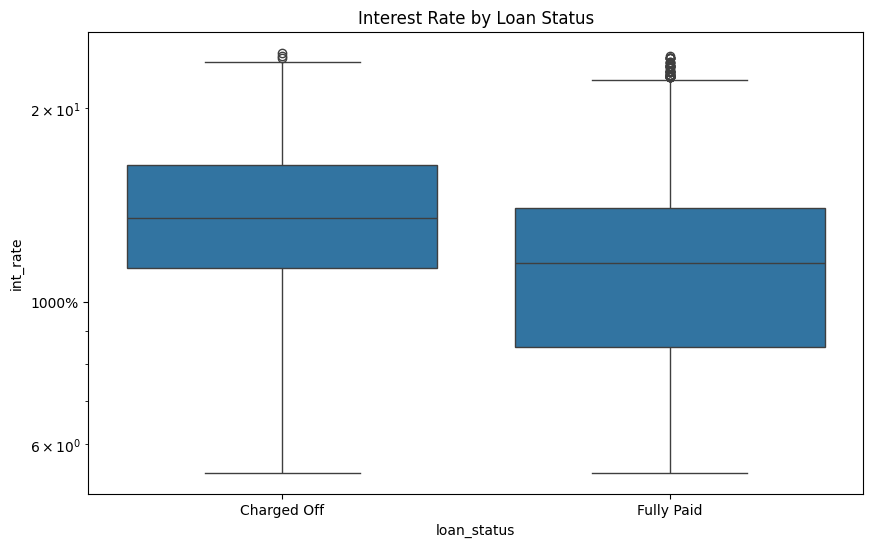

In [82]:
# Distribution of interest rates by loan status
from matplotlib.ticker import FuncFormatter

# Clear the current plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='int_rate', data=loan_df)
plt.title('Interest Rate by Loan Status')
plt.yscale('log')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
plt.show()


Interest rate for loan status Changed off is higher for most count in all ration. 
This might be because of finanical risk invoved.

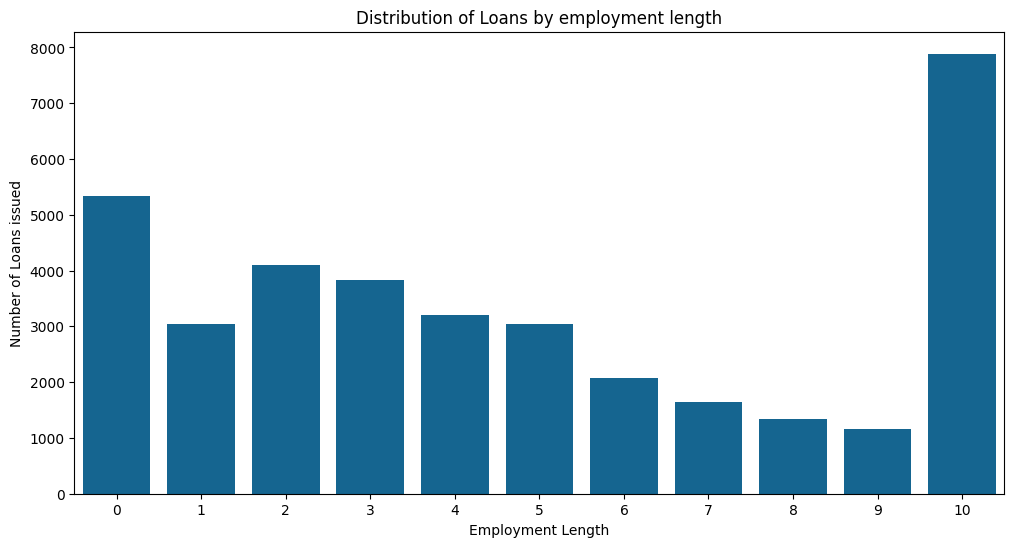

In [83]:
# Distribution of Loans by employment length
plt.figure(figsize=(12,6))
plt.style.use("tableau-colorblind10")
sns.countplot(x='emp_length', data=loan_df)
plt.title('Distribution of Loans by employment length')
plt.xlabel("Employment Length")
plt.ylabel("Number of Loans issued")
plt.show()

Employment length looks fine, 0 and 10 count might be higher because we merge > 10 and <1 to 10 and 0 respectivly 

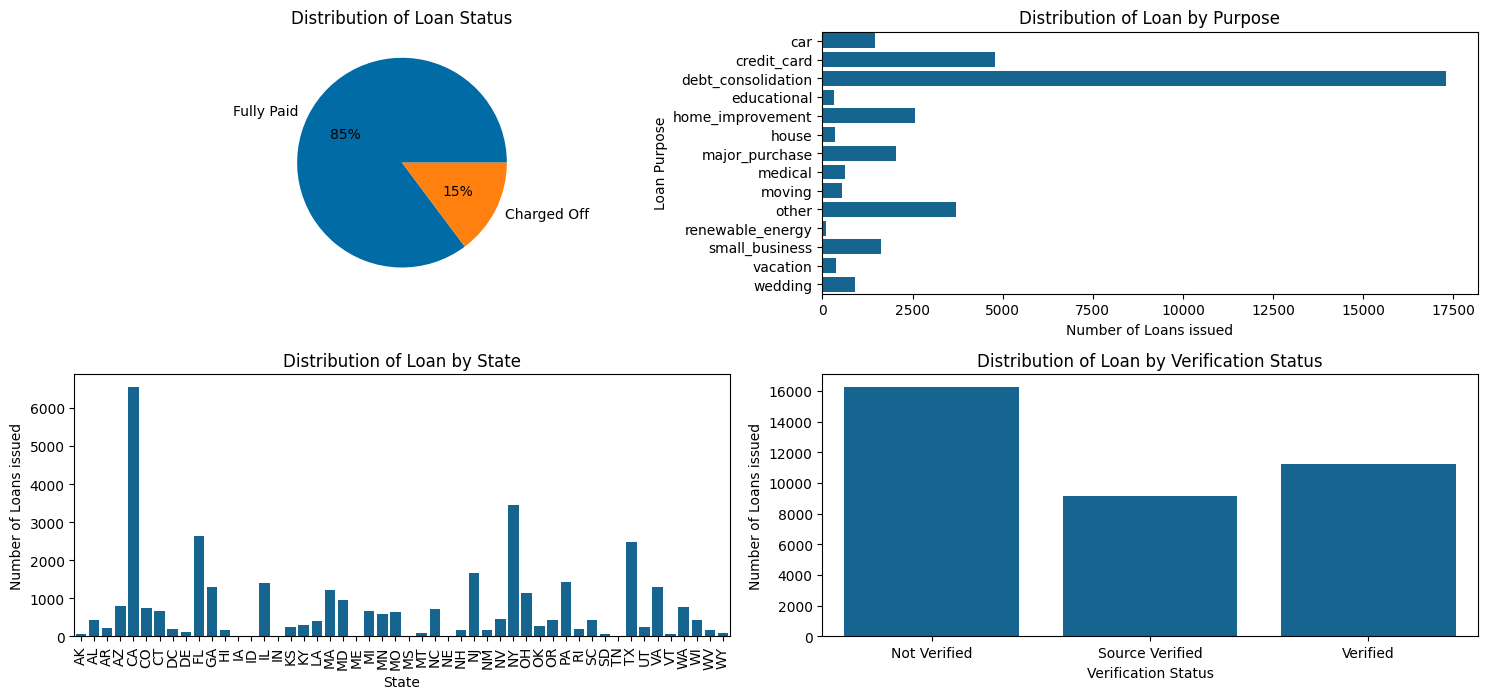

In [84]:
# Univariate Analysis on Unordered Categorical variables
plt.figure(figsize=(15,10))

plt.figure(1)

# Distribution of Loans by Status

plt.subplot(3,2,1)
grouped = loan_df['loan_status'].value_counts()
plt.pie(grouped, autopct='%1.0f%%', labels=grouped.keys())
plt.title('Distribution of Loan Status')


# Distribution of Loan by Purpose
plt.subplot(3,2,2)
sns.countplot(y='purpose', data=loan_df)
plt.title('Distribution of Loan by Purpose')
plt.xlabel("Number of Loans issued")
plt.ylabel("Loan Purpose")

# Distribution of Loan by State
plt.subplot(3,2,3)
sns.countplot(x='addr_state', data=loan_df)
plt.xticks(rotation=90)
plt.title('Distribution of Loan by State')
plt.xlabel("State")
plt.ylabel("Number of Loans issued")
# To rotate axis text
plt.xticks(rotation=90)


# Distribution of Loan by Income Verification Status
plt.subplot(3,2,4)
sns.countplot(x='verification_status', data=loan_df)
plt.title('Distribution of Loan by Verification Status')
plt.xlabel("Verification Status")
plt.ylabel("Number of Loans issued")

plt.tight_layout()
plt.show()

from dataset 15% are charged off.
mostly people took loan for debt consolidation.
Loan amount from CA, NY, TX (all popular) states are higher
Not verified users has good amount of loan count

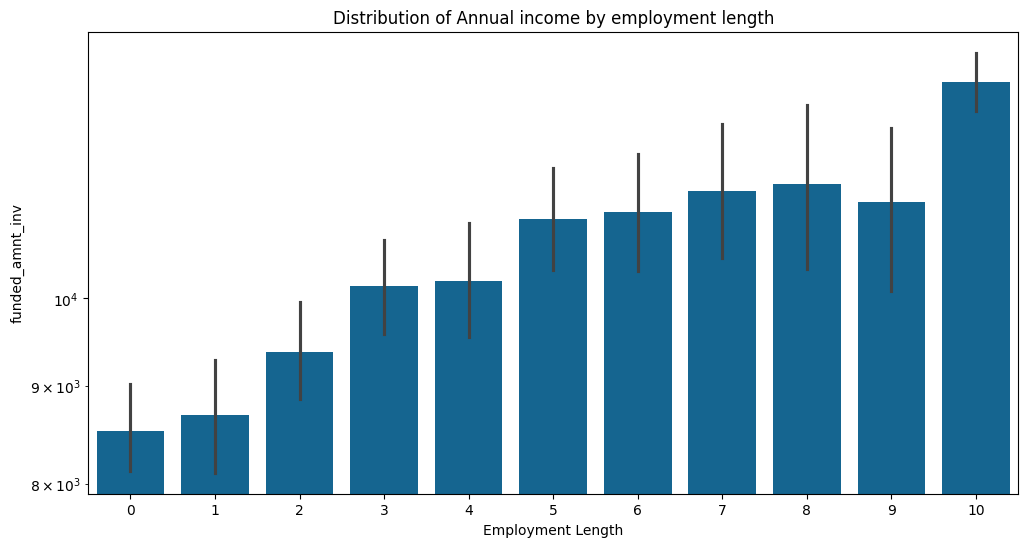

In [21]:
# Distribution of Annual income by employment length
plt.figure(figsize=(12,6))
sns.barplot(x="emp_length", y="funded_amnt_inv", data=defaulters)
plt.title('Distribution of Annual income by employment length')
plt.xlabel("Employment Length")
plt.ylabel("funded_amnt_inv")
plt.yscale('log')
plt.show()

Can see increase in load amount with employment length for defaulters.

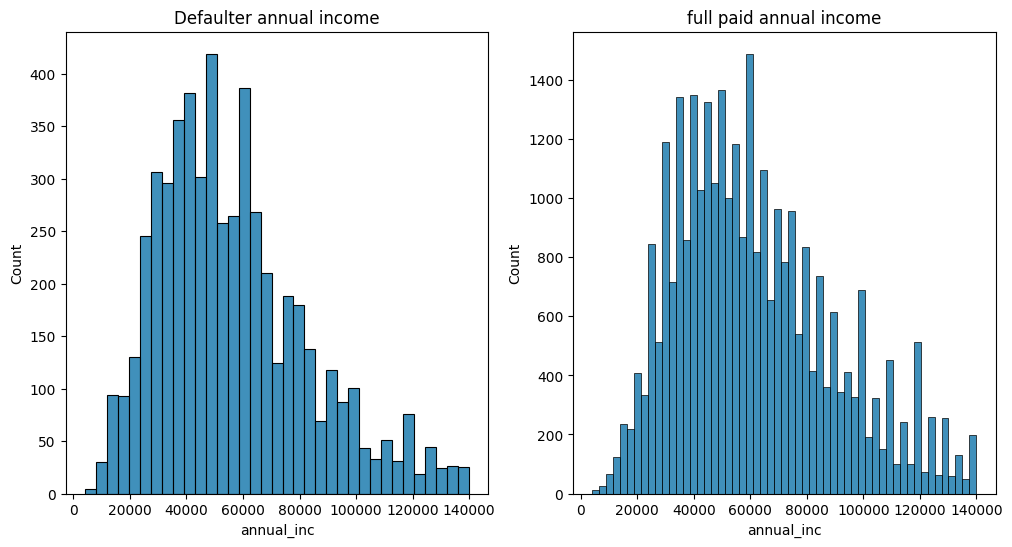

In [22]:
# density of defaulters annual income and loan duration
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(defaulters['annual_inc'], ax=ax[0])
ax[0].set_title("Defaulter annual income")

sns.histplot(valipayers['annual_inc'], ax=ax[1])
ax[1].set_title("full paid annual income")

plt.show()

Defaulters are more under 50k annual income.

Text(0.5, 1.0, 'Loan term of each grade for defaulters')

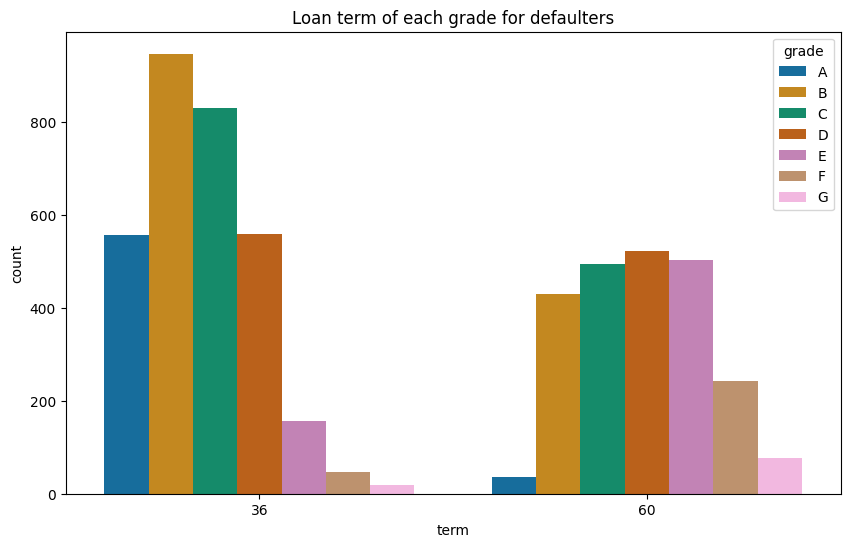

In [23]:
fig, ax = plt.subplots(figsize=(10,6))
sns.set_palette('colorblind')
sns.countplot(x = 'term', hue = 'grade',data = defaulters)
plt.title("Loan term of each grade for defaulters")

For 36 loan term we can see higher loan count in grade A, B, C, D
For 60 loan term we can see higher loan count in B, C, D,E, F

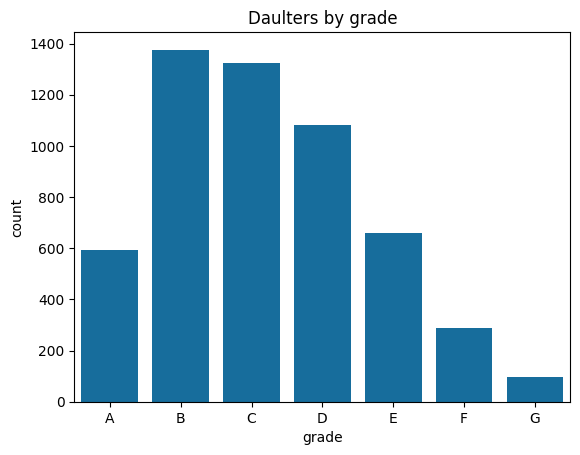

In [24]:
sns.countplot(x = 'grade', data =defaulters, order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])
plt.title("Daulters by grade")
plt.show()


Defaulters are more in B, C, D, E grade

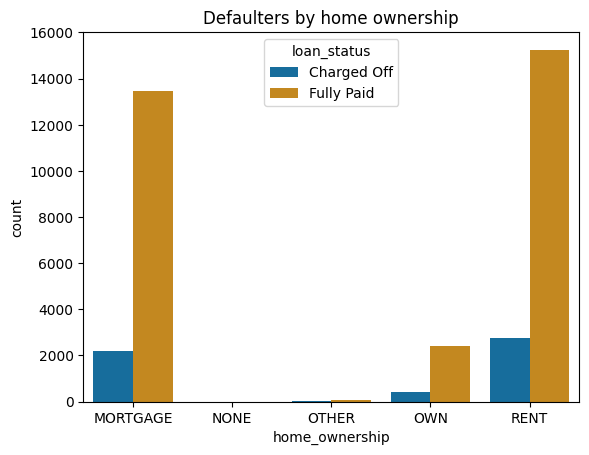

In [25]:
sns.countplot(x = 'home_ownership', hue=loan_df['loan_status'], data =loan_df)
plt.title("Defaulters by home ownership")
plt.show()

People who are in Mortage and Rent ownership has higher defaulter counts. 

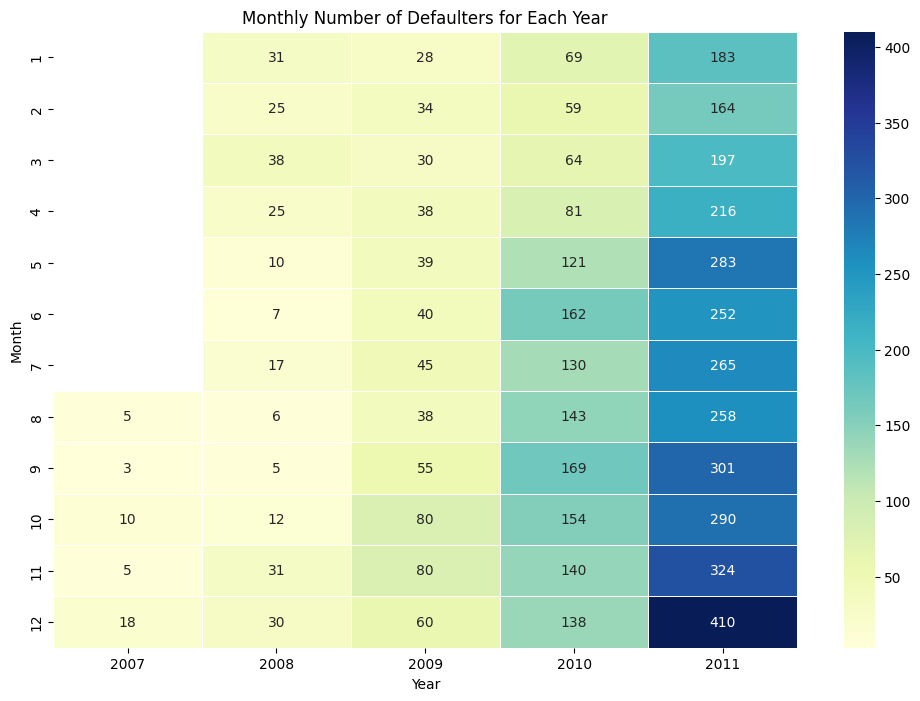

In [32]:
# Get year and months from issue_d (load issue date)
defaulters.loc[:, 'issue_year'] = defaulters.loc[:, 'issue_d'].dt.year  # Extract year from date
defaulters.loc[:, 'issue_month'] = defaulters.loc[:, 'issue_d'].dt.month  # Extract month from date


# Group by year and month and count the number of defaulters
monthly_defaulters = defaulters.groupby(['issue_year', 'issue_month']).size().reset_index(name='count')

# Pivot table by category
pivot_df = monthly_defaulters.pivot(index='issue_month', columns='issue_year', values='count')

# Plotting
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, annot=True, fmt=".0f", cmap='YlGnBu', linewidths=.5)
plt.title('Monthly Number of Defaulters for Each Year')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()

In 2010 and 2011 we can see higher defaulter
2008-2009 recession we are aware, which might had impacted loan payers income and it took q2 2011 to fill the gap.

C:\Users\lenovo\AppData\Local\Temp\ipykernel_10680\4197597444.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_10680\4197597444.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)


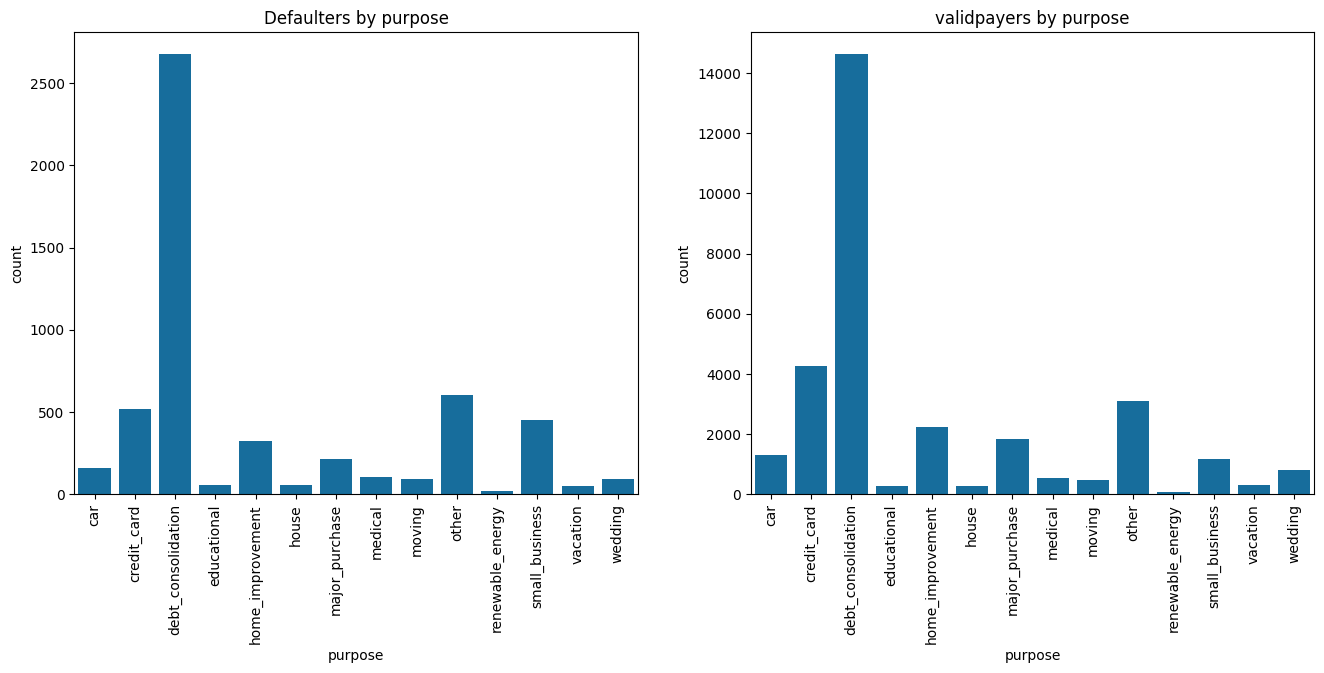

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sns.countplot(x = 'purpose', data =defaulters, ax=ax[0])
ax[0].set_title("Defaulters by purpose")
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)

sns.countplot(x = 'purpose', data =valipayers, ax=ax[1])
ax[1].set_title("validpayers by purpose")
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)

plt.show()

As we see comparision mostly defaulters took loan for debt_consolidation. but same was purpose for valid loan payers too. so purpose don't has any dependency for defaulter identification.

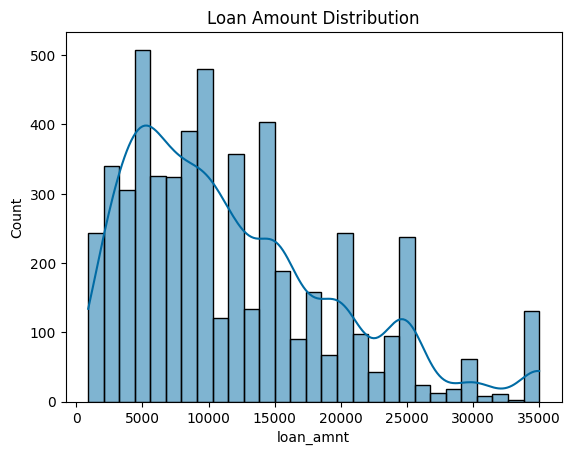

In [85]:
sns.histplot(defaulters.loc[:, 'loan_amnt'], kde=True)
plt.title('Loan Amount Distribution for defaulters')
plt.show()

Loan amount 5000 - 20000 looks popular.

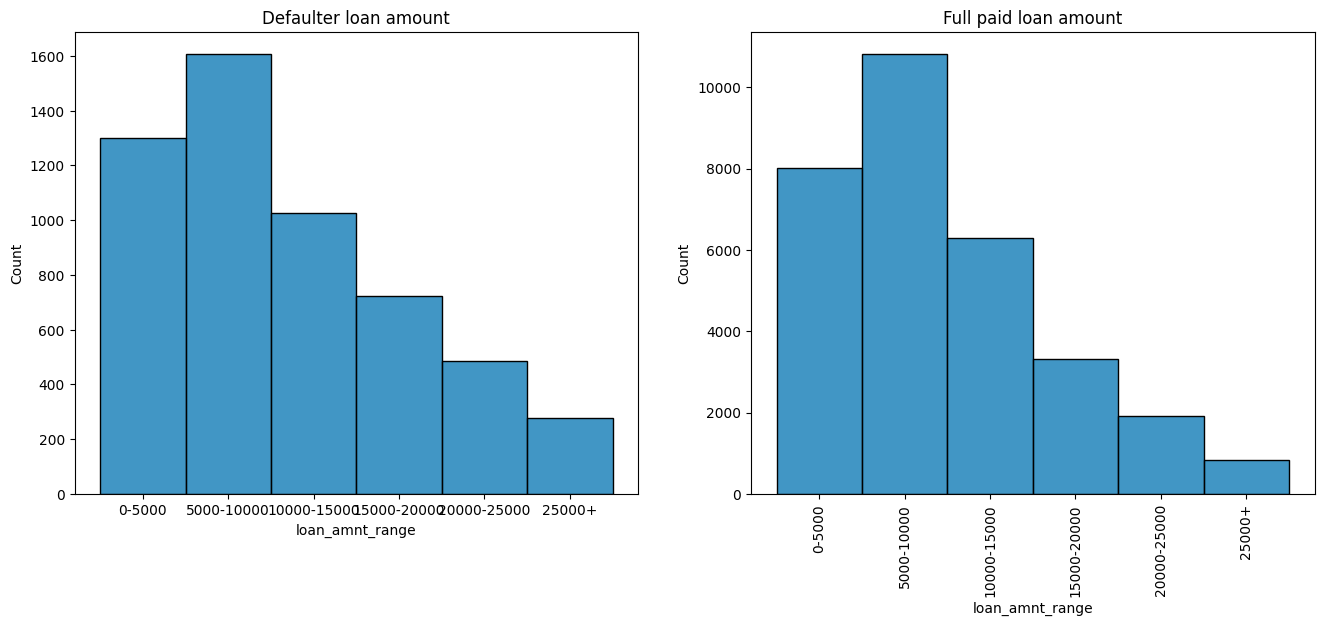

In [34]:
# comparison of defaulter and full paid loan amount
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Plot the defaulter loan amount
sns.histplot(defaulters['loan_amnt_range'], ax=ax[0])
ax[0].set_title("Defaulter loan amount")

# Plot the full paid loan amount
sns.histplot(valipayers['loan_amnt_range'], ax=ax[1])
ax[1].set_title("Full paid loan amount")
plt.xticks(rotation=90)
# Show the plots
plt.show()


Few defaulters are there who count is higher compared to valid payer in case of 25000+

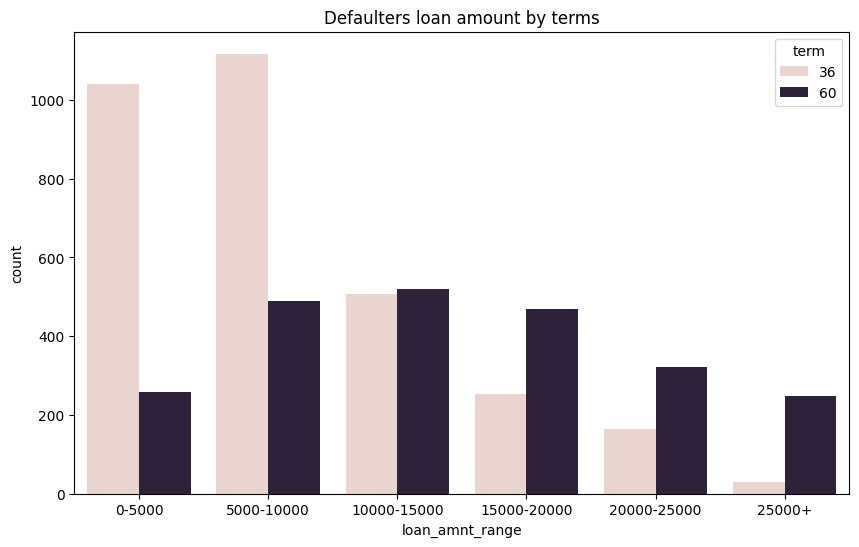

In [35]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'loan_amnt_range', hue=loan_df['term'], data =defaulters)
plt.title("Defaulters loan amount by terms")
plt.show()

Can see loan amount and loan term are impacting defaulters and they are dependent on each other. 

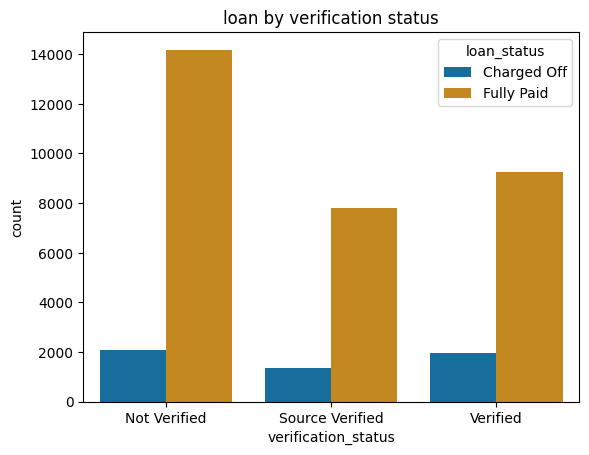

In [36]:
sns.countplot(x = 'verification_status', hue=loan_df['loan_status'], data =loan_df)
plt.title("loan by verification status")
plt.show()

Defaulters accoss verification status. Varification status doesn't look dependent for risk analysis. 

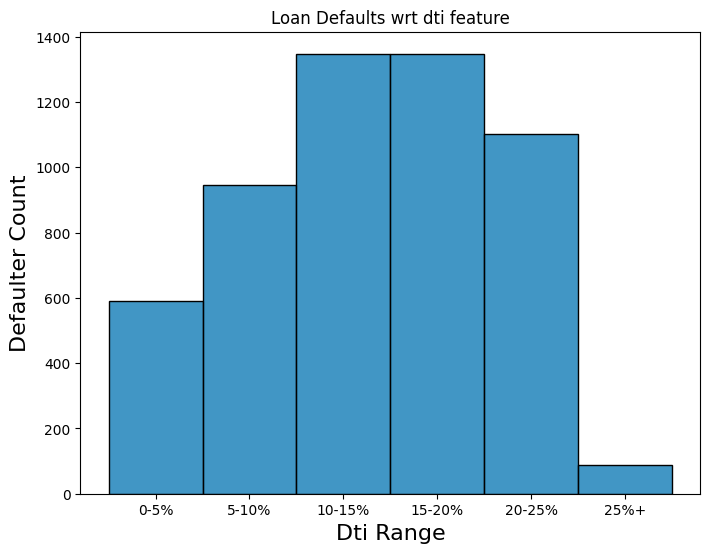

In [39]:
plt.figure(figsize=(8,6))
sns.histplot(x="dti_range", data=defaulters, stat="count",legend=True)
plt.title("Loan Defaults wrt dti feature")
plt.xlabel("Dti Range", fontsize=16)
plt.ylabel("Defaulter Count", fontsize=16)
plt.show()

Defaulters count increases based on dti_range.

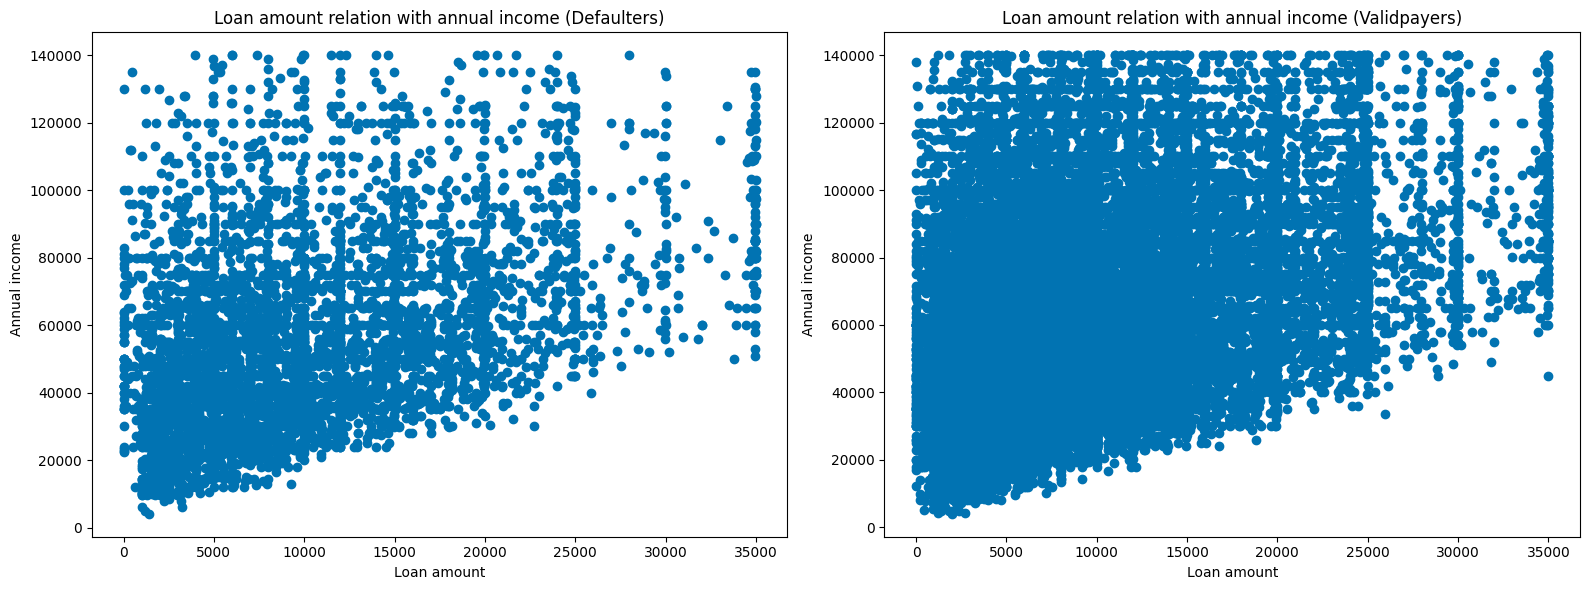

In [60]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

#linear relationship b/w Loan_Amount and ApplicantIncome
# Scatter plot for defaulters
ax[0].scatter(defaulters['funded_amnt_inv'], defaulters['annual_inc'])
ax[0].set_xlabel("Loan amount")
ax[0].set_ylabel("Annual income")
ax[0].set_title("Loan amount relation with annual income (Defaulters)")

# Scatter plot for validpayers
ax[1].scatter(valipayers['funded_amnt_inv'], valipayers['annual_inc'])
ax[1].set_xlabel("Loan amount")
ax[1].set_ylabel("Annual income")
ax[1].set_title("Loan amount relation with annual income (Validpayers)")

plt.tight_layout()
plt.show()

Both are dependent on each other. 

Variables which are impacting the defaulter and can help with risk analysis:
term: Short duration loan with less amount are spiked with defaulter
grade : specific graded has more defaulter
funded_amnt_inv and annual_inc are depended on each other 
dti_range : higher range for more defaulters count. but can see same trade for valid payers too)
purpose: mostly for debt consolidation
int_rate : Higher for defaulters
issue_d : For year 2010, 2011 (just after recession in US) we can see spike for defaulters and more loan count.